# Analayzing marketing campaign dataset

In [1]:
import pandas as pd
m_set=pd.read_csv("marketing.csv",
                 parse_dates=['date_served',
                              'date_subscribed',
                              'date_canceled'])

## EDA

In [2]:
m_set

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True


In [3]:
#Create a missing value function
def missing_value_fun(df,col):
    print("The missing values are:")
    missing_val={}
    all_length=len(df)
    for z in col:
        total_columns_values=df[z].value_counts().sum()
        missing_val[z]=all_length-total_columns_values
    return missing_val

fun_miss=missing_value_fun(m_set, col=m_set.columns)
print(fun_miss)

The missing values are:
{'user_id': 0, 'date_served': 16, 'marketing_channel': 15, 'variant': 0, 'converted': 15, 'language_displayed': 0, 'language_preferred': 0, 'age_group': 0, 'date_subscribed': 8181, 'date_canceled': 9460, 'subscribing_channel': 8181, 'is_retained': 8181}


In [4]:
#exploring ads categories
m_set['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [5]:
#conveys whether the ad was shown to the user in their preferred language
import numpy as np
m_set['is_correct_lang']=np.where(m_set['language_preferred']==m_set['language_preferred'], 'Yes','No')
m_set['is_correct_lang'].value_counts()

Yes    10037
Name: is_correct_lang, dtype: int64

In [6]:
m_set.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,Yes


In [7]:
m_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  is_correct_lang      10037 non-null  object        
dtypes: datetime64[ns](3), object(10

In [8]:
#Number of users see the marketing assets
daily_users=m_set.groupby(['date_served'])['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


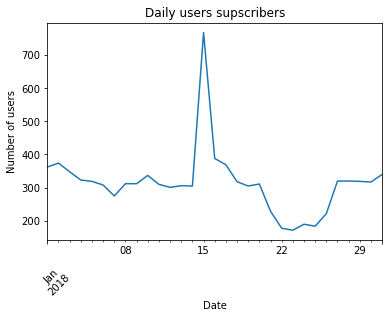

In [9]:
##Plotting
import matplotlib.pyplot as plt
daily_users.plot()
plt.title("Daily users supscribers")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Number of users")
plt.show()

Did you mean: In January 2018, number of users bullish and bearish until mid month. then it went up drastically due to active campaigns in this period followed by back to normal rhythm.

In [10]:
#Number of people Convereted 
subscribers=m_set[m_set['converted']==True]['user_id'].nunique()
subscribers

1015

In [11]:
# Total number of users
total_users= m_set['user_id'].nunique()
total_users

7309

In [12]:
#Total conversion rate
c_rate=subscribers/total_users
print(round(c_rate*100,2), "%")

13.89 %


In [13]:
#retention over a month
retainers=m_set[m_set['is_retained']==True]['user_id'].nunique()
r_rate=retainers/subscribers
print(round(r_rate*100,2), "%")

66.8 %


- A conversion rate of 13.89% is achieved, 1015 users subscribed to our service with retension rate of 66.8% over a month.

## Segmentation

### 1) Retension per ads type

In [14]:
#Segment people who clicked on house ads
houseads=m_set[m_set['subscribing_channel']=='House Ads']
houseads_retained=houseads[houseads['is_retained']==True]['user_id'].nunique()
houseads_subscribers=houseads[houseads['converted']==True]['user_id'].nunique()
houseads_retension=houseads_retained/houseads_subscribers
print("Retension rate per house ads segment is", round(houseads_retension*100,2), "%")

Retension rate per house ads segment is 58.05 %


### 2) Retension per each marketing channel

In [15]:
#customer segmenatation, explore which channel is retain more customers
retain_channels=m_set[m_set['is_retained']==True].groupby(m_set['subscribing_channel'])['user_id'].nunique()
subscrib_channels=m_set[m_set['converted']==True].groupby(m_set['subscribing_channel'])['user_id'].nunique()
#subscrib_channels
rate=retain_channels/subscrib_channels
print(round(rate*100,2))

subscribing_channel
Email        87.58
Facebook     68.78
House Ads    58.05
Instagram    68.10
Push         70.13
Name: user_id, dtype: float64


The retension rate across our marketing channels apparently shows Email platform as the top channel with 87% followed by push 70.13%, instagram 68.10%, facebook 68.78% and House Ads 58.05% respectively

### 3) English speaker segment conversion rate

In [16]:
#english speakers
english_speakers = m_set[m_set['language_displayed'] == 'English']
# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()
# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


### 4) Comparing language conversion rate

In [17]:
m_set['language_displayed'].value_counts()

English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64

In [18]:
languages=m_set.groupby(['language_displayed'])['user_id'].nunique()
lan_subscribers=m_set[m_set['converted']==True].groupby(['language_displayed'])['user_id'].nunique()
lan_convert=lan_subscribers/languages
print(round(lan_convert*100,2),"%")

language_displayed
Arabic     50.00
English    12.92
German     71.62
Spanish    20.00
Name: user_id, dtype: float64 %


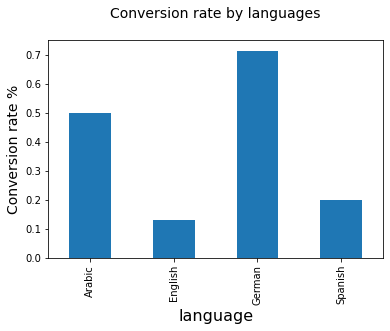

In [19]:
#plotting
lan_convert.plot(kind='bar')
plt.title('Conversion rate by languages\n', size=14)
plt.xlabel('language', size=16)
plt.ylabel('Conversion rate %', size=14)
plt.show()

### 5) Day to day Conversion, retension
The diffreneces in conversion rate based on when in the month

In [20]:
#Daily conversion
date_groups=m_set.groupby(['date_served'])['user_id'].nunique()
date_groups_subscribers=m_set[m_set['converted']==True].groupby(['date_served'])['user_id'].nunique()
daily_conversion=date_groups_subscribers/date_groups
print(daily_conversion)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


In [21]:
#Daily subscribers quality
date_groups_all=m_set.groupby(['date_subscribed'])['user_id'].nunique()
date_groups_re=m_set[m_set['is_retained']==True].groupby(['date_subscribed'])['user_id'].nunique()
daily_retension=date_groups_re/date_groups_all
print(daily_retension)

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.714286
2018-01-16    0.701923
2018-01-17    0.616279
2018-01-18    0.733333
2018-01-19    0.684211
2018-01-20    0.809524
2018-01-21    0.761905
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.750000
2018-01-30    0.714286
2018-01-31    0.666667
Name: user_id, dtype: float64


In [22]:
#plotting
daily_retension_rate=pd.DataFrame(daily_retension.reset_index())
daily_retension_rate.columns=['date_subscribed','retension_rate']

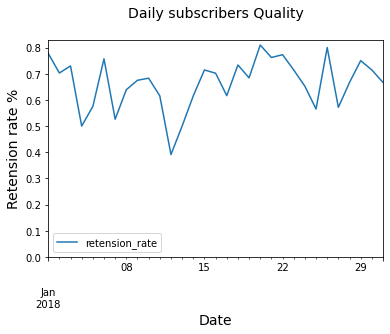

In [23]:
#plotting
daily_retension_rate.plot('date_subscribed','retension_rate')
plt.title('Daily subscribers Quality\n', size=14)
plt.xlabel('Date', size=14)
plt.ylabel('Retension rate %', size=14)
plt.ylim(0)
plt.show()

### 6) Daily language prefrences

In [24]:
lang=m_set.groupby(['date_served','language_preferred'])['user_id'].count()
print(lang.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


In [25]:
lang=pd.DataFrame(lang.unstack(level=1))
lang

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0
2018-01-06,3.0,298.0,3.0,11.0
2018-01-07,2.0,267.0,2.0,10.0
2018-01-08,NaN,303.0,6.0,10.0
2018-01-09,NaN,305.0,NaN,10.0


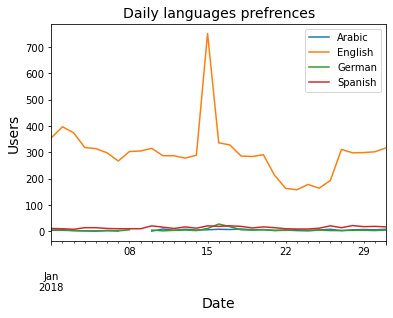

In [26]:
lang.plot()
plt.title('Daily languages prefrences', size=14)
plt.xlabel('Date', size=14)
plt.ylabel('Users', size=14)
plt.legend(loc='upper right', labels=lang.columns.values)
plt.show()

### 7) Language prefrences by age

In [27]:
lang_age=m_set.groupby(['language_preferred','age_group'])['user_id'].count()
print(lang_age.head())

language_preferred  age_group  
Arabic              0-18 years     19
                    19-24 years    26
                    24-30 years    19
                    30-36 years    19
                    36-45 years    19
Name: user_id, dtype: int64


In [28]:
lang_age=pd.DataFrame(lang_age.unstack(level=1))
lang_age

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


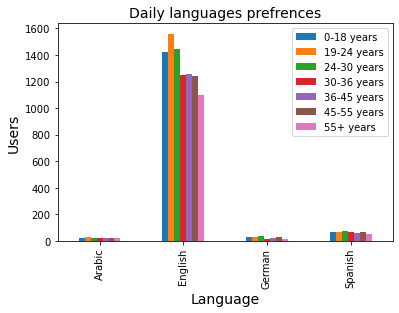

In [29]:
lang_age.plot(kind='bar')
plt.title('Daily languages prefrences', size=14)
plt.xlabel('Language', size=14)
plt.ylabel('Users', size=14)
plt.legend(loc='upper right', labels=lang_age.columns.values)
plt.show()

In [30]:
#conversion function
def conversion_rate(dataframe,column_names):
    converted=dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    total=dataframe.groupby(column_names)['user_id'].nunique()
    conversion_rate=converted/total
    conversion_rate=conversion_rate.fillna(0)
    return conversion_rate

In [31]:
#Retension function
def dow_retension(dataframe,column_names):
    retained=dataframe[dataframe['is_retained']==True].groupby(column_names)['user_id'].nunique()
    total=dataframe.groupby(column_names)['user_id'].nunique()
    retension_rate=retained/total
    retension_rate=retension_rate.fillna(0)
    return retension_rate

In [32]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.show()
        plt.clf()

### Conversion rates per each segment (age groups)

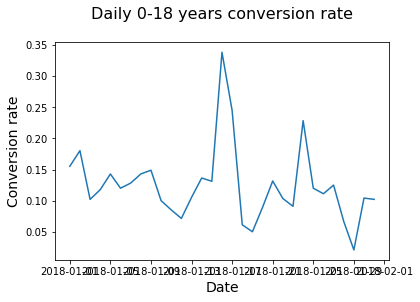

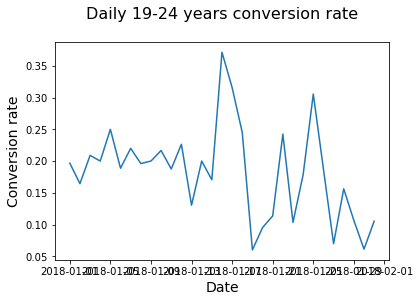

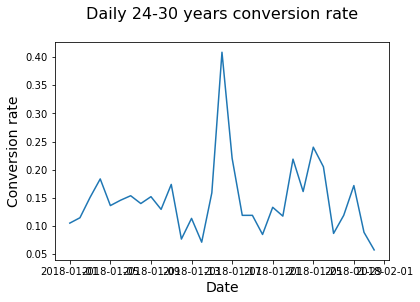

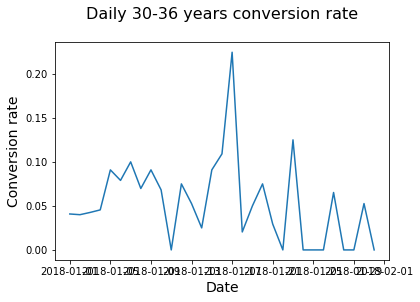

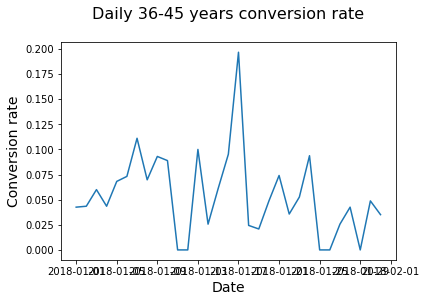

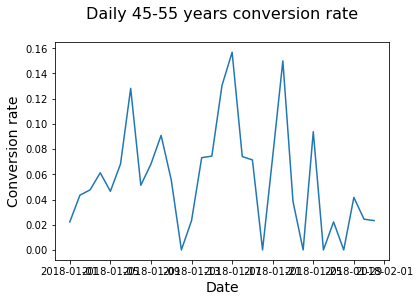

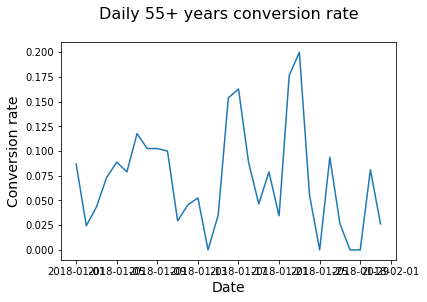

<Figure size 432x288 with 0 Axes>

In [33]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(m_set,['date_served', 'age_group'])
# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))
# Plot the results
plotting_conv(age_group_df)

### Analyze House ads

Problem: irregularities have been noticed in conversion rate of house ads, figuring out if these changes are natural fluctuations or if they require further investigation.

In [34]:
m_set.head(2)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,Yes


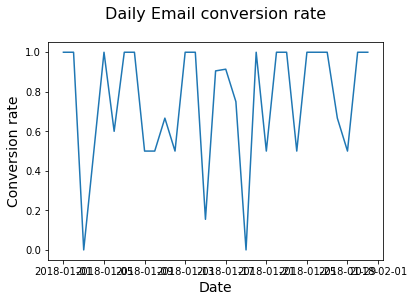

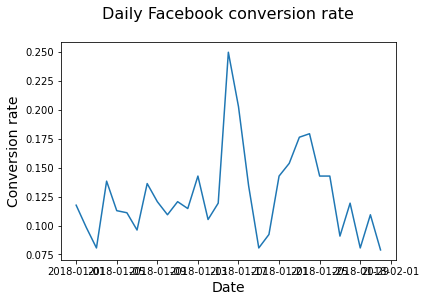

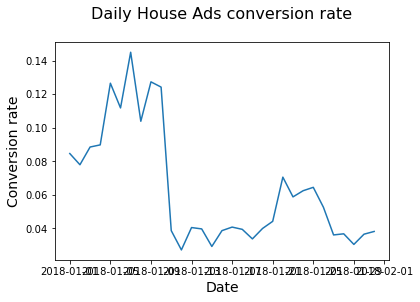

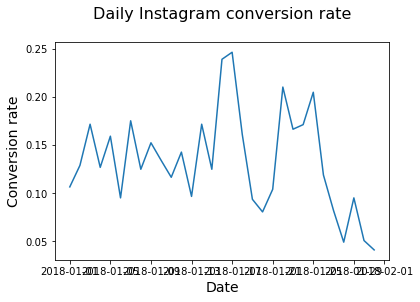

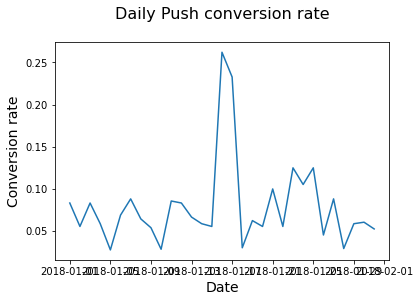

<Figure size 432x288 with 0 Axes>

In [35]:
channels_conv = conversion_rate(m_set,['date_served', 'marketing_channel'])
channels_convdf=pd.DataFrame(channels_conv.unstack(level=1))
channels_plot=plotting_conv(channels_convdf)

House ads shows sudden decrease around january 11th on thursday.

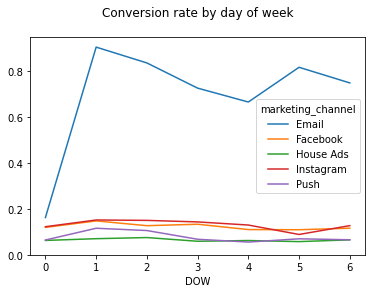

In [36]:
#Add day of the weeks
m_set['DOW']=m_set['date_served'].dt.dayofweek
dow_conversion = conversion_rate(m_set,['DOW', 'marketing_channel'])
dow_conversion_plot=pd.DataFrame(dow_conversion.unstack(level=1))
dow_conversion_plot.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

We've checked that the house ads fluctuations is not normal, we are going to investigate by language over time.

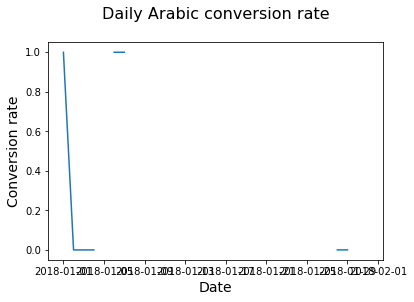

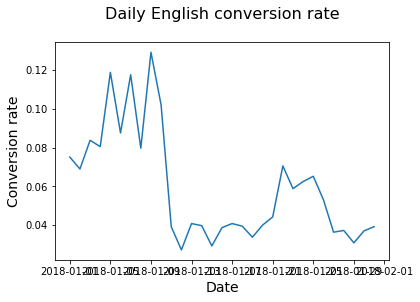

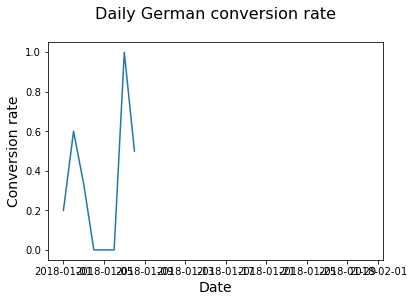

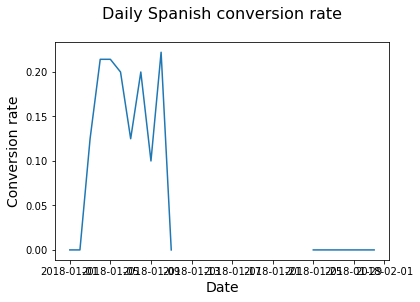

<Figure size 432x288 with 0 Axes>

In [37]:
#Isolating houseads
houseads_dataset=m_set[m_set['marketing_channel']=='House Ads']
houseads_dataset_con=conversion_rate(houseads_dataset,['date_served', 'language_displayed'])
houseads_dataset_con=pd.DataFrame(houseads_dataset_con.unstack(level=1))
houseads_plot=plotting_conv(houseads_dataset_con)

The English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

In [38]:
houseads_dataset['is_correct_language']=np.where(houseads_dataset['language_displayed']==houseads_dataset['language_preferred'],'Yes','No')
language_check=houseads_dataset.groupby(['date_served','is_correct_language'])['user_id'].nunique()
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
#Check missing values
check_miss=missing_value_fun(language_check_df, col=language_check_df.columns)
print (check_miss)

The missing values are:
{'No': 0, 'Yes': 0}


<ipython-input-38-c253501299ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseads_dataset['is_correct_language']=np.where(houseads_dataset['language_displayed']==houseads_dataset['language_preferred'],'Yes','No')


In [39]:
language_check_df.head(2)

is_correct_language,No,Yes
date_served,,
2018-01-01,2.0,187.0
2018-01-02,3.0,216.0


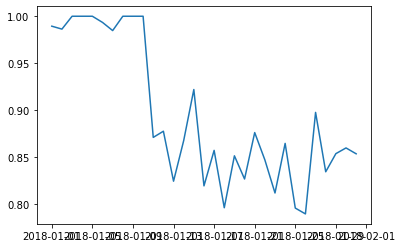

In [40]:
#check the percenatge 
language_check_df['pct'] =language_check_df['Yes']/language_check_df.sum(axis=1)
# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

Indeed the problem is that the house ads have been underperforming due to serving all ads in English rather than each user's preferred language

#Resolving the issue

How many subscribers we lost as a result of this bug?

## A/B Testing

1) Get the conversion rate of each variant

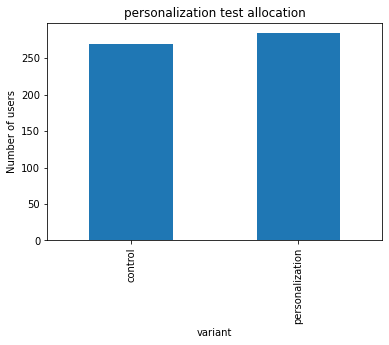

In [44]:
import matplotlib.pyplot as plt
email=m_set[m_set['marketing_channel']=="Email"]
allocation=email.groupby(['variant'])['user_id'].nunique()
allocation.plot(kind='bar')
plt.title("personalization test allocation")
plt.ylabel("Number of users")
plt.show()

In [45]:
subscribers=email.groupby(['user_id','variant'])['converted'].max()
subscribers = pd.DataFrame(subscribers.unstack(level=1))
subscribers

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True
...,...,...
a100007288,True,NaN
a100007289,True,NaN
a100007290,True,NaN


In [46]:
control=subscribers['control'].dropna()
personalization=subscribers['personalization'].dropna()

In [47]:
import numpy as np
print("Control conversion rate is :", np.mean(control))
print("personalization conversion rate is :", np.mean(personalization))

Control conversion rate is : 0.2814814814814815
personalization conversion rate is : 0.3908450704225352


In [48]:
# evaluate lift equation
def lift(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
    return str(round(lift*100, 2)) + '%'
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


Personalization variant achieve 38.85%, we are going to test how much we can trust this result.

In [49]:
from scipy.stats import ttest_ind
t=ttest_ind(control,personalization)
print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


The P value is less than 0.05, therefore it's statistically significat at 95% signigicant level and the diffrence in conversion rate is statistically significat

In [50]:
#lift function per language segments
def ab_segmentation(segment):
    for x in np.unique(m_set[segment].values):
        print(x)
        language_data=m_set[(m_set['marketing_channel']=='Email') & (m_set[segment]==x)]
        subscribers=language_data.groupby(['user_id','variant'])['converted'].max()
        subscribers=pd.DataFrame(subscribers.unstack(level=1))
        control=subscribers['control'].dropna()
        personalization=subscribers['personalization'].dropna()
        print("Lift :", lift(control,personalization))
        print("T-statistic :", ttest_ind(control,personalization))

In [51]:
print(ab_segmentation('language_displayed'))

Arabic
Lift : 50.0%
T-statistic : Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001)
English
Lift : 39.0%
T-statistic : Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815)
German
Lift : -1.62%
T-statistic : Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678)
Spanish
Lift : 166.67%
T-statistic : Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524)
None


English and spanish are performing well "statistically significant" other than arabic and german

In [52]:
print(ab_segmentation('age_group'))

0-18 years
Lift : 121.4%
T-statistic : Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226)
19-24 years
Lift : 106.24%
T-statistic : Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134)
24-30 years
Lift : 161.19%
T-statistic : Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337)
30-36 years
Lift : -100.0%
T-statistic : Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137)
36-45 years
Lift : -85.23%
T-statistic : Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829)
45-55 years
Lift : -72.22%
T-statistic : Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196)
55+ years
Lift : -100.0%
T-statistic : Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435)
None


All groups are statistically significant and personalizations dosn't affect certain type of users